# Airfares

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering as ac
from scipy.cluster.hierarchy import dendrogram
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.io as pio
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as clust
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,LassoCV,Lasso
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import kaleido

## Part A. 
### A simple predictive model of the target variable - "simple" meaning choose just ONE explanatory variable.  
#### How did you choose the explanatory variable?
><font color='blue'> By observing the heatmap, we can find DISTANCE has the highest correlation coefficient with Fare among all variables, so I choose DISTANCE as my explanatory variable. </font>

#### Does your model under or overfit the data?  How do you know?
><font color='blue'> Since R-square is high on training data and test data, and MAE nad MAPE in training data are lower than in test data, this model perform well. </font>

In [2]:
# Cleaning up data
df1 = pd.read_csv('Airfares.csv') # Reading data
df1.isnull().sum() # Checking missing values
df1[df1.duplicated()].count() # Checking duplicate values
df1.drop_duplicates(keep='first',inplace=True) # Dropping duplicate values

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
count,634.000000,634.000000,634.000000,634.000000,634.000000,6.340000e+02,6.340000e+02,634.000000,634.000000,634.000000
mean,1.203580,2.761830,4443.864795,27771.578864,27687.012618,4.540268e+06,3.202566e+06,980.438486,12737.105678,161.272729
std,0.203856,0.746806,1726.004288,3588.002827,4615.791900,3.003914e+06,2.741896e+06,645.425353,13150.860599,76.017476
min,1.000000,0.000000,1230.480000,14600.000000,14600.000000,2.983800e+04,1.117450e+05,114.000000,1504.000000,42.470000
25%,1.040000,3.000000,3090.137500,24706.000000,23978.500000,1.862106e+06,1.228816e+06,457.000000,5305.250000,106.357500
50%,1.150000,3.000000,4208.185000,28637.000000,26457.500000,3.532657e+06,2.195215e+06,854.000000,7786.500000,144.600000
75%,1.300000,3.000000,5480.575000,29693.500000,31981.000000,7.830332e+06,4.549784e+06,1312.500000,14090.500000,209.350000
max,1.940000,3.000000,10000.000000,38813.000000,38813.000000,9.056076e+06,9.056076e+06,2764.000000,73892.000000,402.020000


array([[<AxesSubplot:title={'center':'COUPON'}>,
        <AxesSubplot:title={'center':'NEW'}>,
        <AxesSubplot:title={'center':'HI'}>],
       [<AxesSubplot:title={'center':'S_INCOME'}>,
        <AxesSubplot:title={'center':'E_INCOME'}>,
        <AxesSubplot:title={'center':'S_POP'}>],
       [<AxesSubplot:title={'center':'E_POP'}>,
        <AxesSubplot:title={'center':'DISTANCE'}>,
        <AxesSubplot:title={'center':'PAX'}>],
       [<AxesSubplot:title={'center':'FARE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

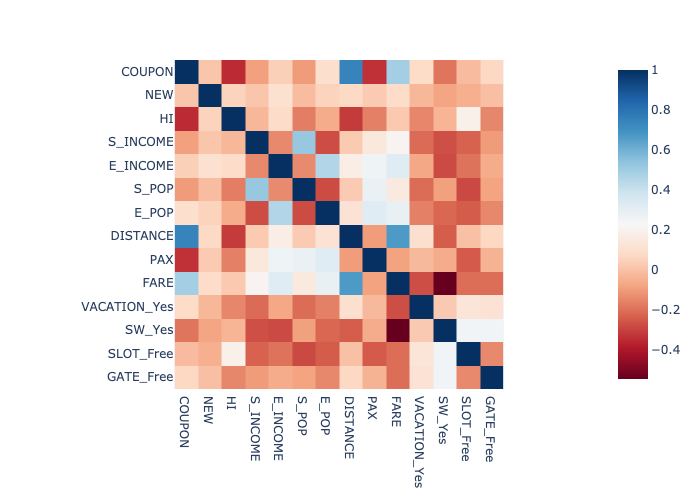

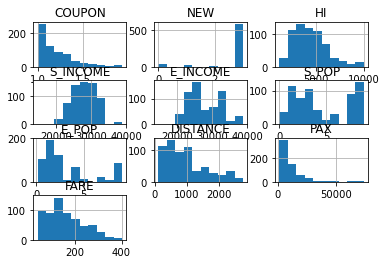

In [3]:
#EDA
display(df1.describe())
display(df1.hist())

# Selecting Numeric Data

NumericData = df1.select_dtypes(include='number')

# Normalizing Numeric Data
NumericDataNorm = (NumericData - NumericData.mean())/NumericData.std()

# Dealing with catogrical varaible
Dummy1 = pd.get_dummies(df1['VACATION'], drop_first=True).rename(columns={'Yes': "VACATION_Yes"})
Dummy2 = pd.get_dummies(df1['SW'], drop_first=True).rename(columns={'Yes': "SW_Yes"})
Dummy3 = pd.get_dummies(df1['SLOT'], drop_first=True).rename(columns={'Free': "SLOT_Free"})
Dummy4 = pd.get_dummies(df1['GATE'], drop_first=True).rename(columns={'Free': "GATE_Free"})
# Dropping the first column to avoid dummy variable trap

# Combine Data
df1norm = pd.concat([NumericDataNorm, Dummy1, Dummy2, Dummy3, Dummy4], axis=1)

# Heatmap
corr = df1norm.corr()
# Caculate correlation coefficients.

DfLSHeatPlot = px.imshow(
   corr,color_continuous_scale="Rdbu")

DfLSHeatPlot.show("png")
# Show the plot.


In [4]:
# Splitting data

X=df1norm[['DISTANCE']]  # Putting DISTANCE as independent variable
y=df1norm['FARE']      # Putting FARE as dependent variable 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [5]:
# Building regression

lin_model = LinearRegression()    
lin_model.fit(x_train, y_train) 

LinearRegression()

In [6]:
# Showing performance

# Creating formula

def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create MAE
    mae = mean_absolute_error(y_train,y_hat).round(3)
    
    # Create MAPE
    mape = mean_absolute_percentage_error(y_train,y_hat).round(3)*100
    
    # Create MSE
    mse = (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
    
    train_metrics = [r2, mae, mape,mse]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    
    print(pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_.round(3)}))
    print('\n')
    print(all_metrics)
    print('\n')
def data_model_plot(X_train,X_test,y_train,y_test,model):

    x_train_sorted = X_train.copy()
    y_train_pred = model.predict(X_train)

    x_train_sorted.insert(1,'y_train_hat',y_train_pred)
    x_train_sorted.sort_values(by='DISTANCE',ascending=True,inplace=True)

    x_test_sorted = X_test.copy()
    y_test_pred = model.predict(X_test)

    x_test_sorted.insert(1,'y_test_hat',y_test_pred)
    x_test_sorted.sort_values(by='DISTANCE',ascending=True,inplace=True)

    trace0 = dict(mode='markers',
                  type='scatter',
                  name='Training Data',
                  marker = dict(size=10,
                                line=dict(width=1,
                                          color='DarkSlateGrey'),
                                opacity=0.7
                               ),
                  x=X_train.iloc[:,0],
                  y=y_train,
                  xaxis='x1',
                  yaxis='y'
                 )
    trace1 = dict(mode='markers',
                  type='scatter',
                  name='Test Data',
                  marker = dict(size=10,
                                line=dict(width=1,
                                          color='DarkSlateGrey'),
                                opacity=0.7
                               ),
                  x=X_test.iloc[:,0],
                  y=y_test,
                  xaxis='x2',
                  yaxis='y'
                 )

    trace2 = dict(mode='lines',
                  type='scatter',
                  name='Model->Train',
                  x=x_train_sorted.iloc[:,0],
                  y=x_train_sorted['y_train_hat'],
                  xaxis='x1',
                  yaxis='y'
                 )
    trace3 = dict(mode='lines',
                  type='scatter',
                  name='Model->Test',
                  x=x_test_sorted.iloc[:,0],
                  y=x_test_sorted['y_test_hat'],
                  xaxis='x2',
                  yaxis='y'
                 )
    layout = dict(title='Train vs Test',
                  xaxis1 = dict(title='Explanatory Variable',
                                showgrid=False,
                                anchor='y',
                                domain=[0,0.45]
                               ),
                  xaxis2 = dict(title='Explanatory Variable',
                                showgrid=False,
                                anchor='y',
                                domain=[0.55,1]
                               ),              
                  yaxis = dict(title='Target Variable',
                               showgrid=False,
                               zeroline=False
                              ),
                  plot_bgcolor='#eee8e8',
                  height=500,
                  width=900
                 )


    plot_data = [trace0,trace1,trace2,trace3]

    # Bring data and layout objects together in a single figure
    fig = go.Figure(plot_data,layout)

    # Render the figure
    return fig.show("png")

def display_output(X_train,X_test,y_train,y_test,model):
    print(pd.DataFrame({'Predictor':X_train.columns, 'coefficent':model.coef_}))
    print('\n')
    print(train_test_metrics(X_train,X_test,y_train,y_test,model))
    print('\n')
    data_model_plot(X_train,X_test,y_train,y_test,model)


  Predictor  coefficent
0  DISTANCE    0.664003


  Predictor  coefficent
0  DISTANCE       0.664


        Train     Test
R2      0.432    0.479
MAE     0.632    0.604
MAPE  179.600  173.100
SSE   253.963   96.082


None




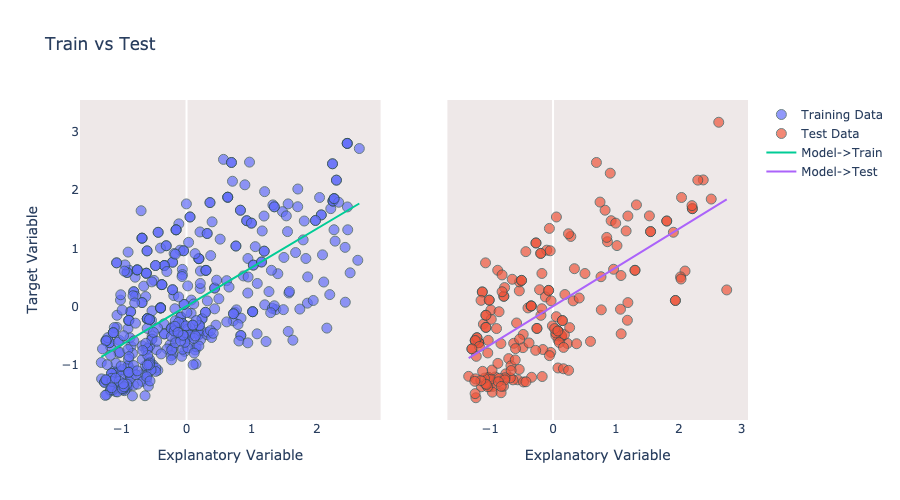

In [7]:
# Show regression plot and results
    
display_output(x_train,x_test,y_train,y_test,lin_model)


## Part B. 
### Create a slightly more complicated predictive model of the target variable.  In particular, add 1-3 more variables that you think have potential to improve your model.

><font color='blue'> By observing the heatmap, we can find the four variables with the highest correlation coefficient with Fare in descending order are DISTANCE, COUPON, E_INCOME, E_POP, and VACATION_Yes. We remove COUPONS from our explanatory variable list because COUPON has a high correlation coefficient with DISTANCE, which can cause MulitCollinearity in regression. </font>

#### Take note of any differences in model performance from 1. to 2.

><font color='blue'> R-square in the new model is higher than in the old model, and MAE, MAPE, and SSE in the new model are lower than in the old model. However, since MAE and MAPE in new model's training set are lower than in test set, this new model is overfitting. </font>

#### Do you notice any major changes in the magnitudes of your parameter estimates?  

><font color='blue'> Compared to the first regression model, DISTANCE in this new model has a lower coefficient, and VACATION_Yes has the highest coefficient in this new model.</font>

#### Pick one parameter estimate and, in words, describe what it means?

><font color='blue'> The coefficient of DISTANCE means for every one unit increase in DISTANCE, the FARE will increase by 0.65 dollars.</font>

In [8]:
# Splitting data

X=df1norm[['DISTANCE','E_INCOME','E_POP','VACATION_Yes']]  
y=df1norm['FARE']      # Putting FARE as dependent variable 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 109)

In [9]:
# Building regression

lin_model = LinearRegression()    
lin_model.fit(x_train, y_train) 

LinearRegression()

      Predictor  coefficent
0      DISTANCE    0.648975
1      E_INCOME    0.161154
2         E_POP    0.082670
3  VACATION_Yes   -0.715760


      Predictor  coefficent
0      DISTANCE       0.649
1      E_INCOME       0.161
2         E_POP       0.083
3  VACATION_Yes      -0.716


        Train     Test
R2      0.598    0.608
MAE     0.512    0.510
MAPE  153.200  175.300
SSE   179.670   72.287


None




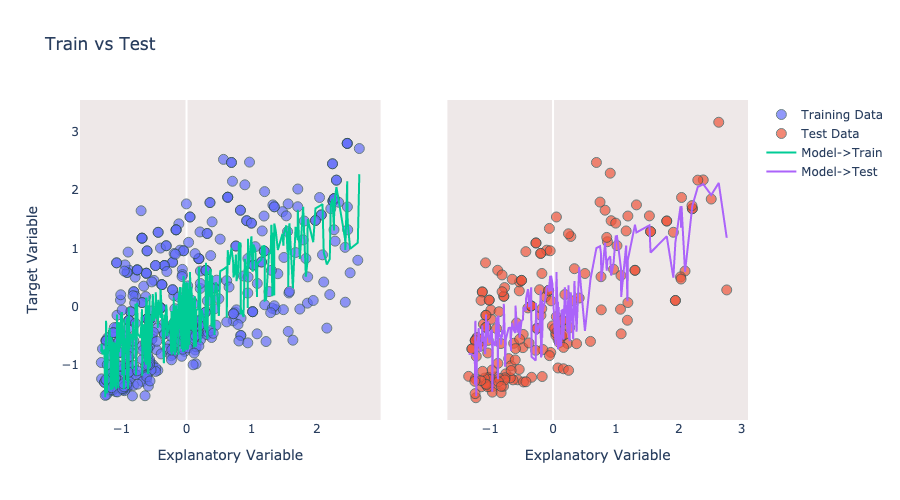

In [10]:
# Show regression plot and results
    
display_output(x_train,x_test,y_train,y_test,lin_model)

## Part C. 
### Add all potential explanatory variables to your model and any data transformations you think could be helpful.  Use Ridge or Lasso regression in collaboration with Cross-Validation to arrive at a final model form. Note: your use of the methods above should result in some parameters dropping out of your model - take note of which parameters and associated variables are important to good model fit and a low degree of model variability.

><font color='blue'> The Final Model is the best model with a low MAPE score, a low MAE score, and a high R-square in both train and test data, which is 0.782 and 0.793. Variables DISTANCE, GATE_Free, E_POP, HI, PAX, S_POP, SLOT_Free, SW_Yes, and VACATION_Yes are important to good model and a low degree of model variability.</font>




In [11]:
predictors = ['COUPON', 'DISTANCE', 'E_INCOME', 'E_POP',
       'GATE_Free', 'HI', 'NEW', 'PAX', 'SLOT_Free', 'SW_Yes',
       'S_INCOME', 'S_POP', 'VACATION_Yes']
X = df1norm[predictors]
y = df1norm['FARE']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=109)

r_alphas = [0.04,0.06,0.08,0.085,0.09,0.099,.1,0.11,0.2,0.25]

model = RidgeCV(alphas=r_alphas)
model.fit(X_train,y_train)

train_test_metrics(X_train,X_test,y_train,y_test,model)

       Predictor  coefficent
0         COUPON      -0.016
1       DISTANCE       0.647
2       E_INCOME       0.082
3          E_POP       0.170
4      GATE_Free      -0.296
5             HI       0.194
6            NEW      -0.004
7            PAX      -0.160
8      SLOT_Free      -0.212
9         SW_Yes      -0.525
10      S_INCOME       0.062
11         S_POP       0.147
12  VACATION_Yes      -0.442


        Train    Test
R2      0.782   0.793
MAE     0.365   0.355
MAPE  111.100  97.700
SSE    97.236  38.132


